In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pyaudio
import wave
import struct 

In [4]:
file_path = "sample3.cvu"

CHUNK_SIZE = 1024

file_stream = open(file_path, 'rb', buffering=CHUNK_SIZE)

In [5]:
peek_result = file_stream.peek()
(samples, channels, samplerate) = struct.unpack('IHH', peek_result[:8])

print("Samples: {}\nChannels: {}\nSamplerate: {}".format(samples, channels, samplerate))

Samples: 2594876072
Channels: 43674
Samplerate: 43674


In [6]:
read_data = file_stream.read() # first chunk
file_stream.close()
print("Length of read chunk: {}".format(len(read_data)))

Length of read chunk: 583344


In [7]:
# https://www.bogotobogo.com/python/python_bits_bytes_bitstring_constBitStream.php
from bitstring import BitStream, BitArray
b = BitArray(read_data[0:])
# b.bin

In [8]:
b[0:128].bin

'10101000101010101010101010011010100110101010101010011010101010101010011010101010100110011010101010101001101010101001101010101010'

In [9]:
b_converted = np.array(b[64:]).astype(np.int8)
len(b_converted)

4666688

In [12]:
test_data = b_converted[0:]
test_data

array([1, 0, 1, ..., 0, 0, 1], dtype=int8)

In [13]:
rtd = test_data.reshape([-1,2])

In [14]:
l_ch = rtd[:][:,0]
r_ch = rtd[:][:,1]

# print("L Ch: {}".format(l_ch))
# print("R Ch: {}".format(r_ch))

In [15]:
def test_dm_sum(array, samplerate):
    sum = 0
    new_array = []

    for i in array:
        if i == 0:
            sum -= 16
        else:
            sum += 16
#         sum = int((abs(sum) % (samplerate / 2)) * np.sign(sum))
        new_array.append(sum)
    return (sum, new_array)

lch2_sum, l_ch2 = test_dm_sum(l_ch, samplerate)
rch2_sum, r_ch2 = test_dm_sum(r_ch, samplerate)

# print("L Ch PseudoDecode: {}".format(l_ch2))
# print("R Ch PseudoDecode: {}".format(r_ch2))

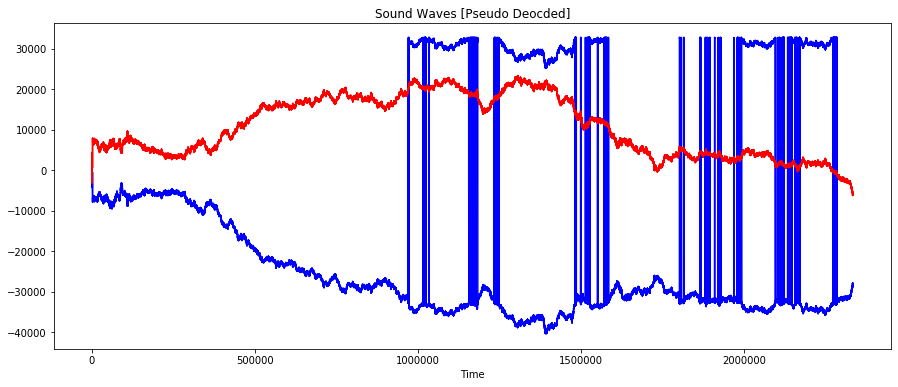

In [16]:
# plot
fig, ax = plt.subplots(figsize=(15, 6))
plt.title("Sound Waves [Pseudo Deocded]") 
plt.xlabel("Time") 
plt.plot(l_ch2, color='b') 
plt.plot(r_ch2, color='r')
plt.plot(np.array(l_ch2).astype(np.int16), color='b') # per samples
plt.plot(np.array(r_ch2).astype(np.int16), color='r')
# plt.xlim(xlim)
# plt.ylim([-33000,33000])
plt.show() 

In [17]:
mono_ch = test_data
mono_sum, mono_ch2 = test_dm_sum(mono_ch, samplerate)

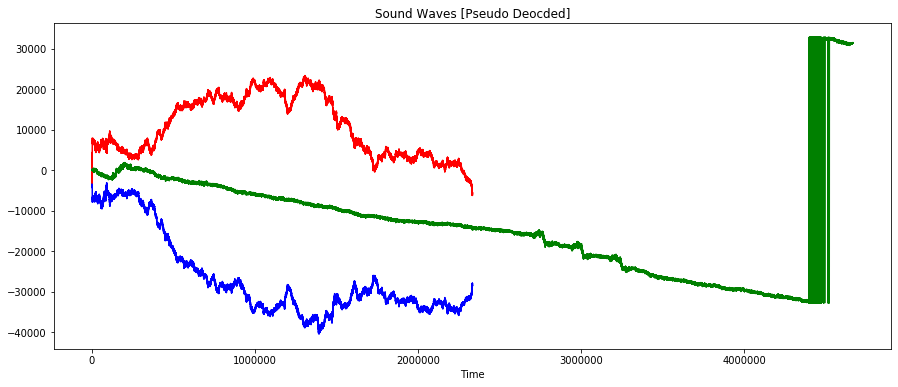

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.title("Sound Waves [Pseudo Deocded]") 
plt.xlabel("Time") 
plt.plot(l_ch2, color='b') 
plt.plot(r_ch2, color='r')
plt.plot(np.array(mono_ch2).astype(np.int16), color='g') # per samples
# plt.xlim(xlim)
# plt.ylim([-33000,33000])
plt.show() 